# Задание

Набор данных ex7data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X1 и X2 - координаты точек, для которых необходимо выделить главные компоненты.

Набор данных ex7faces.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 5000 изображений 32x32 в оттенках серого. Каждый пиксель представляет собой значение яркости (вещественное число). Каждое изображение сохранено в виде вектора из 1024 элементов. В результате загрузки набора данных должна быть получена матрица 5000x1024.


1. Загрузите данные ex7data1.mat из файла.
2. Постройте график загруженного набора данных.
3. Реализуйте функцию вычисления матрицы ковариации данных.
4. Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).
5. Постройте на графике из пункта 2 собственные векторы матрицы ковариации.
6. Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.
7. Реализуйте функцию вычисления обратного преобразования.
8. Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).
9. Загрузите данные ex7faces.mat из файла.
10. Визуализируйте 100 случайных изображений из набора данных.
11. С помощью метода главных компонент вычислите собственные векторы.
12. Визуализируйте 36 главных компонент с наибольшей дисперсией.
13. Как изменилось качество выбранных изображений?
14. Визуализируйте 100 главных компонент с наибольшей дисперсией.
15. Как изменилось качество выбранных изображений?
16. Используйте изображение, сжатое в лабораторной работе №6 (Кластеризация).
17. С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.
18. Соответствует ли 2D изображение какой-либо из проекций в 3D?

In [1]:
import math

import pandas as pd
import numpy as np

from scipy import io
from scipy import linalg

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#1
ex7data1 = io.loadmat('Data/Lab 7/ex7data1.mat')
X = ex7data1['X']

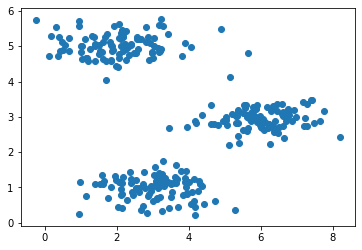

In [3]:
#2
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
#3
def get_covariance_matrix(A):                                                                                                        
    return (1.0/A.shape[0]) * (A.T).dot(A)

In [5]:
#4
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)

    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma

X_norm, mu, sigma = feature_normalize(X)

C = get_covariance_matrix(X_norm)
U, S, Vh = linalg.svd(C)
U

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

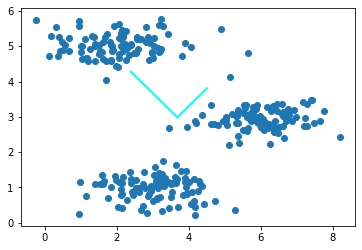

In [6]:
#5
def draw_line(p1, p2, **kwargs):
    plt.plot(np.array([p1[0], p2[0]]), np.array([p1[1], p2[1]]), **kwargs)
    
plt.scatter(X[:,0], X[:,1])
draw_line(mu, mu + 1.5 * S[0] * U[:, 0], c='cyan', linewidth=2)
draw_line(mu, mu + 1.5 * S[1] * U[:, 1], c='cyan', linewidth=2)

In [7]:
#6
def project_data(X, U, K):
    Z = np.zeros((X.shape[0], K))
    
    U_reduce = U[:,:K]
    Z = X.dot(U_reduce)

    return Z

Z = project_data(X_norm, U, 1)
for i, j in zip(Z, X_norm[:5]):
    print(i, j)

[1.3587863] [-0.95834799  0.96326603]
[0.03582464] [1.02696731 1.07763101]
[-0.85377231] [1.38797849 0.18056211]
[0.97011969] [-0.40593667  0.96601976]
[0.98722254] [-0.23533308  1.16081042]


In [8]:
#7
def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    U_reduce = U[:,:K]
    X_rec = Z.dot(U_reduce.T)

    return X_rec

X_rec = recover_data(Z, U, 1)

for i, j in zip(X_rec[:5], X_norm[:5]):
    print(i, j)

[-0.96080701  0.96080701] [-0.95834799  0.96326603]
[-0.02533185  0.02533185] [1.02696731 1.07763101]
[ 0.60370819 -0.60370819] [1.38797849 0.18056211]
[-0.68597821  0.68597821] [-0.40593667  0.96601976]
[-0.69807175  0.69807175] [-0.23533308  1.16081042]


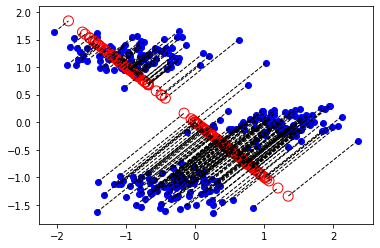

In [9]:
#8
plt.scatter(X_norm[:,0], X_norm[:,1], color='b')
plt.scatter(X_rec[:, 0], X_rec[:, 1], s=100, facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:], X_rec[i,:], linestyle='--', color='k', linewidth=1)

In [10]:
#9
ex7faces = io.loadmat('Data/Lab 7/ex7faces.mat')
X = ex7faces['X']

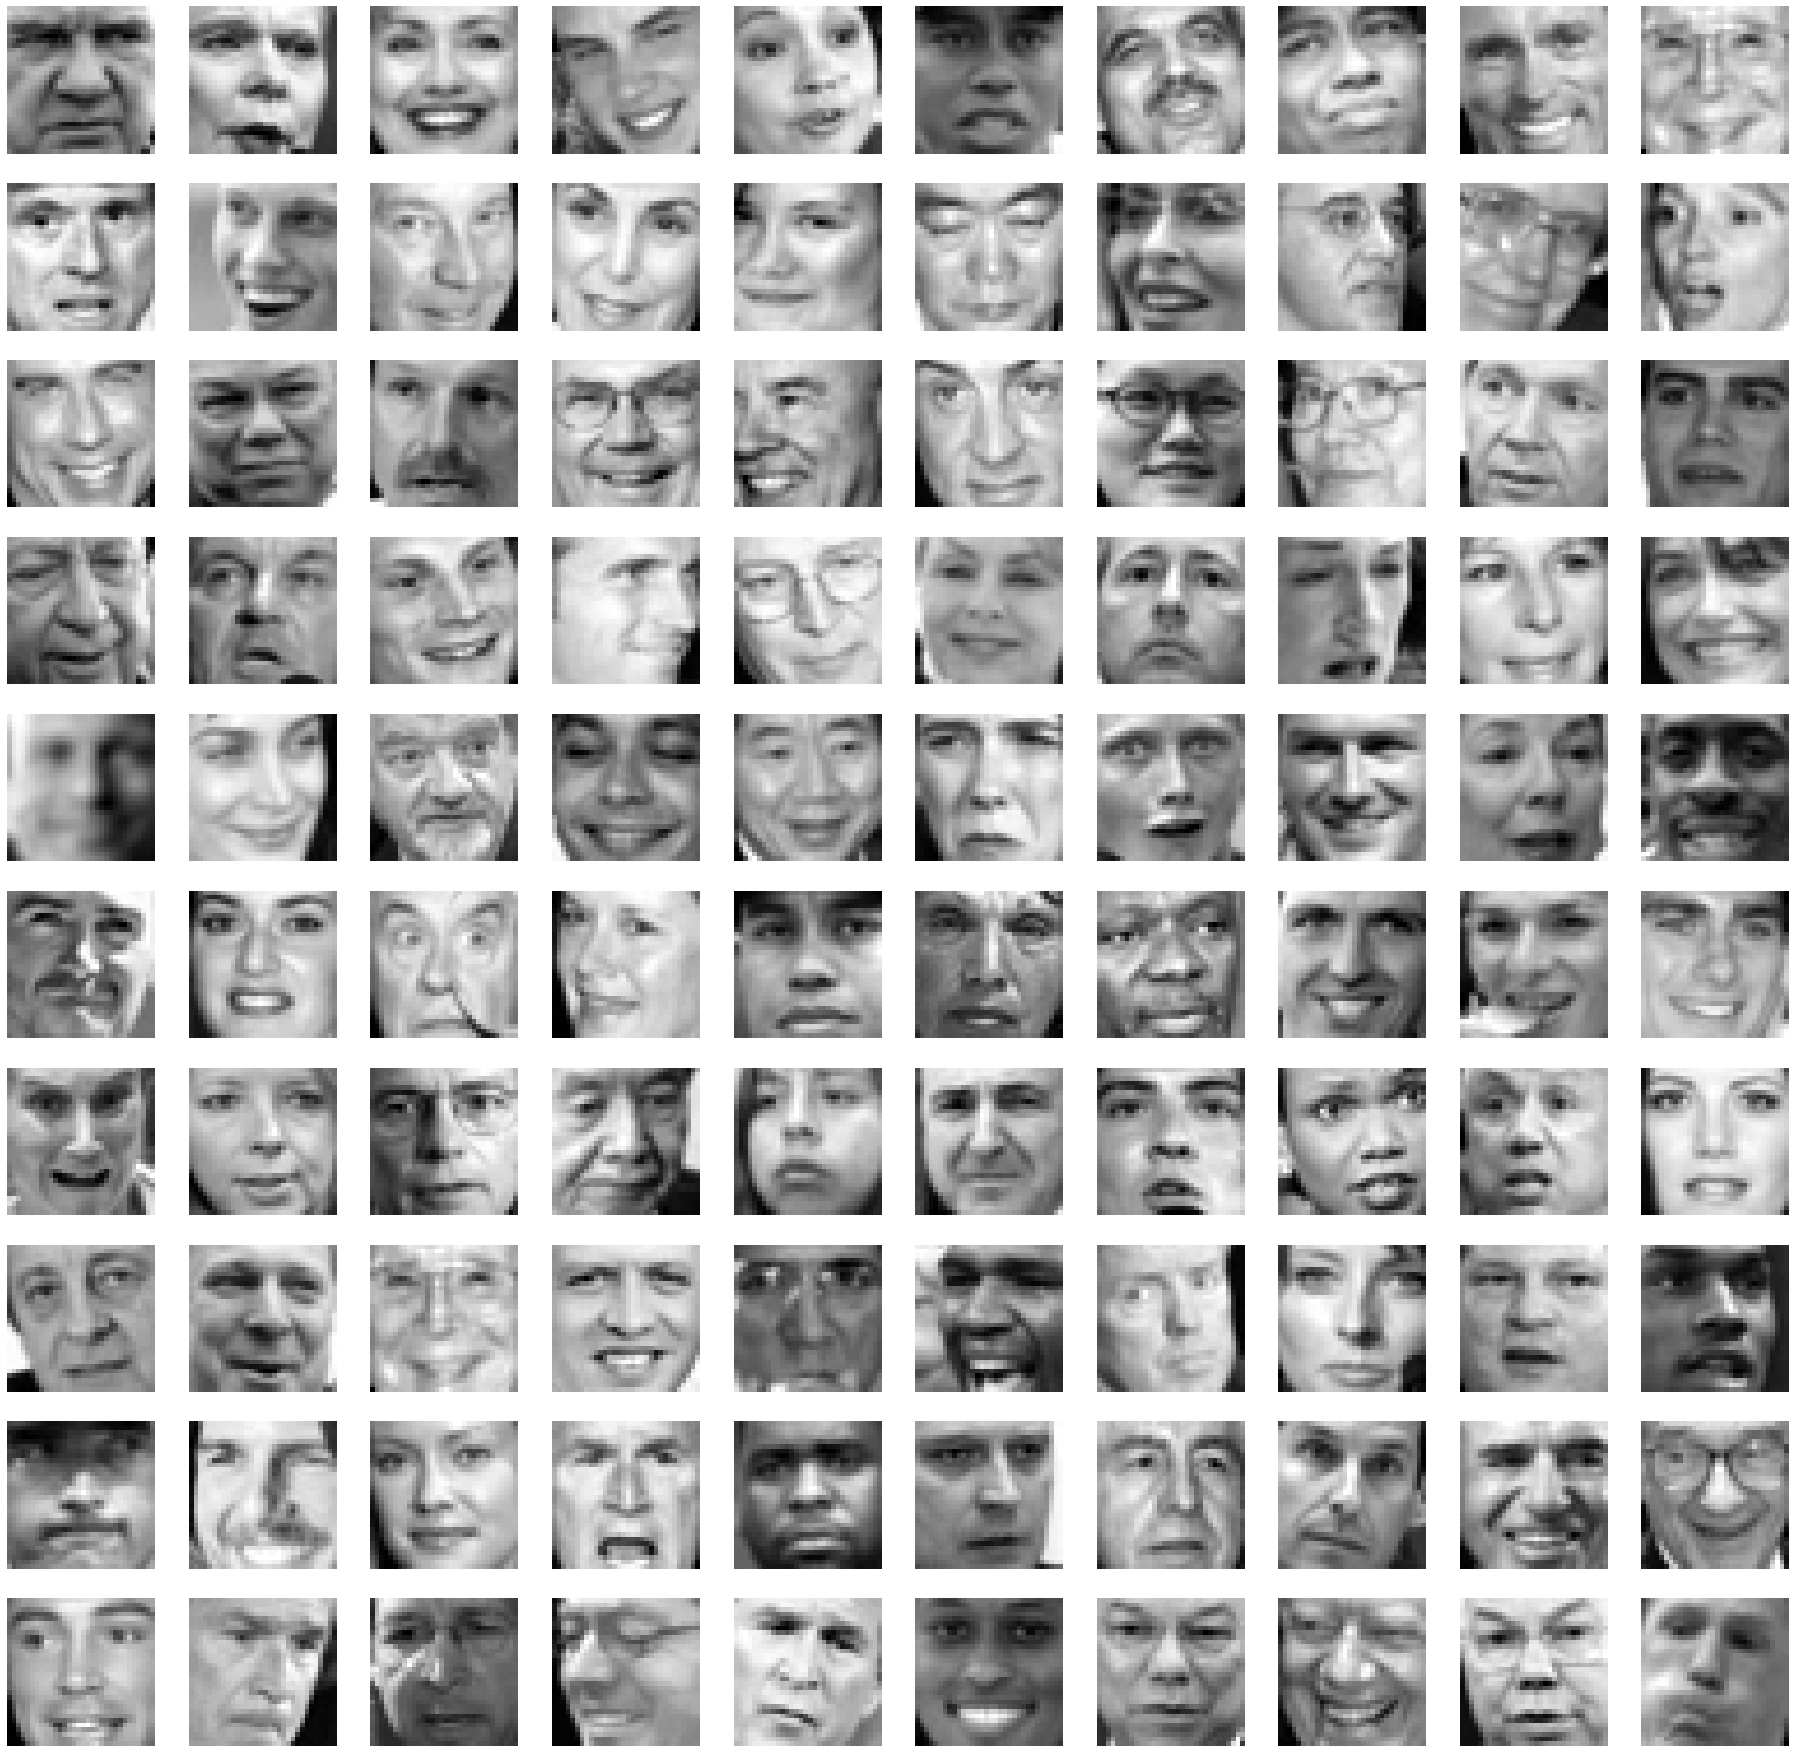

In [11]:
#10
def show_images(X, img_size=32):
    img_in_row = 10
    img_in_col = int(100 / img_in_row)
    f, axarr = plt.subplots(img_in_col, img_in_row, 
                            figsize=(32,32))
    row_ind = -1

    for i, ind in enumerate(np.random.randint(len(X), size=100)):
        if i % img_in_row == 0:
            row_ind += 1

        col_ind = i - row_ind * img_in_row

        axarr[row_ind, col_ind].imshow(X[ind].reshape(img_size,img_size).T, cmap="gray")
        axarr[row_ind, col_ind].axis('off')
    
show_images(X)

In [12]:
#11
X_norm, mu, sigma = feature_normalize(X)

C = get_covariance_matrix(X_norm)
U, S, Vh = linalg.svd(C)
U

array([[-0.01425307, -0.03606596, -0.04561884, ...,  0.00521903,
         0.00091143,  0.00077515],
       [-0.01474233, -0.03809858, -0.04756249, ..., -0.01142763,
        -0.00228691, -0.00434598],
       [-0.01501482, -0.03988747, -0.05082085, ...,  0.01843345,
         0.00554132,  0.00873415],
       ...,
       [-0.00895052,  0.03119618, -0.05691806, ...,  0.0011493 ,
         0.00452914, -0.01218846],
       [-0.00769526,  0.0290752 , -0.05579144, ..., -0.00103011,
        -0.00647834,  0.00752741],
       [-0.00692969,  0.02725819, -0.05339471, ...,  0.00266801,
         0.00543461, -0.00218828]])

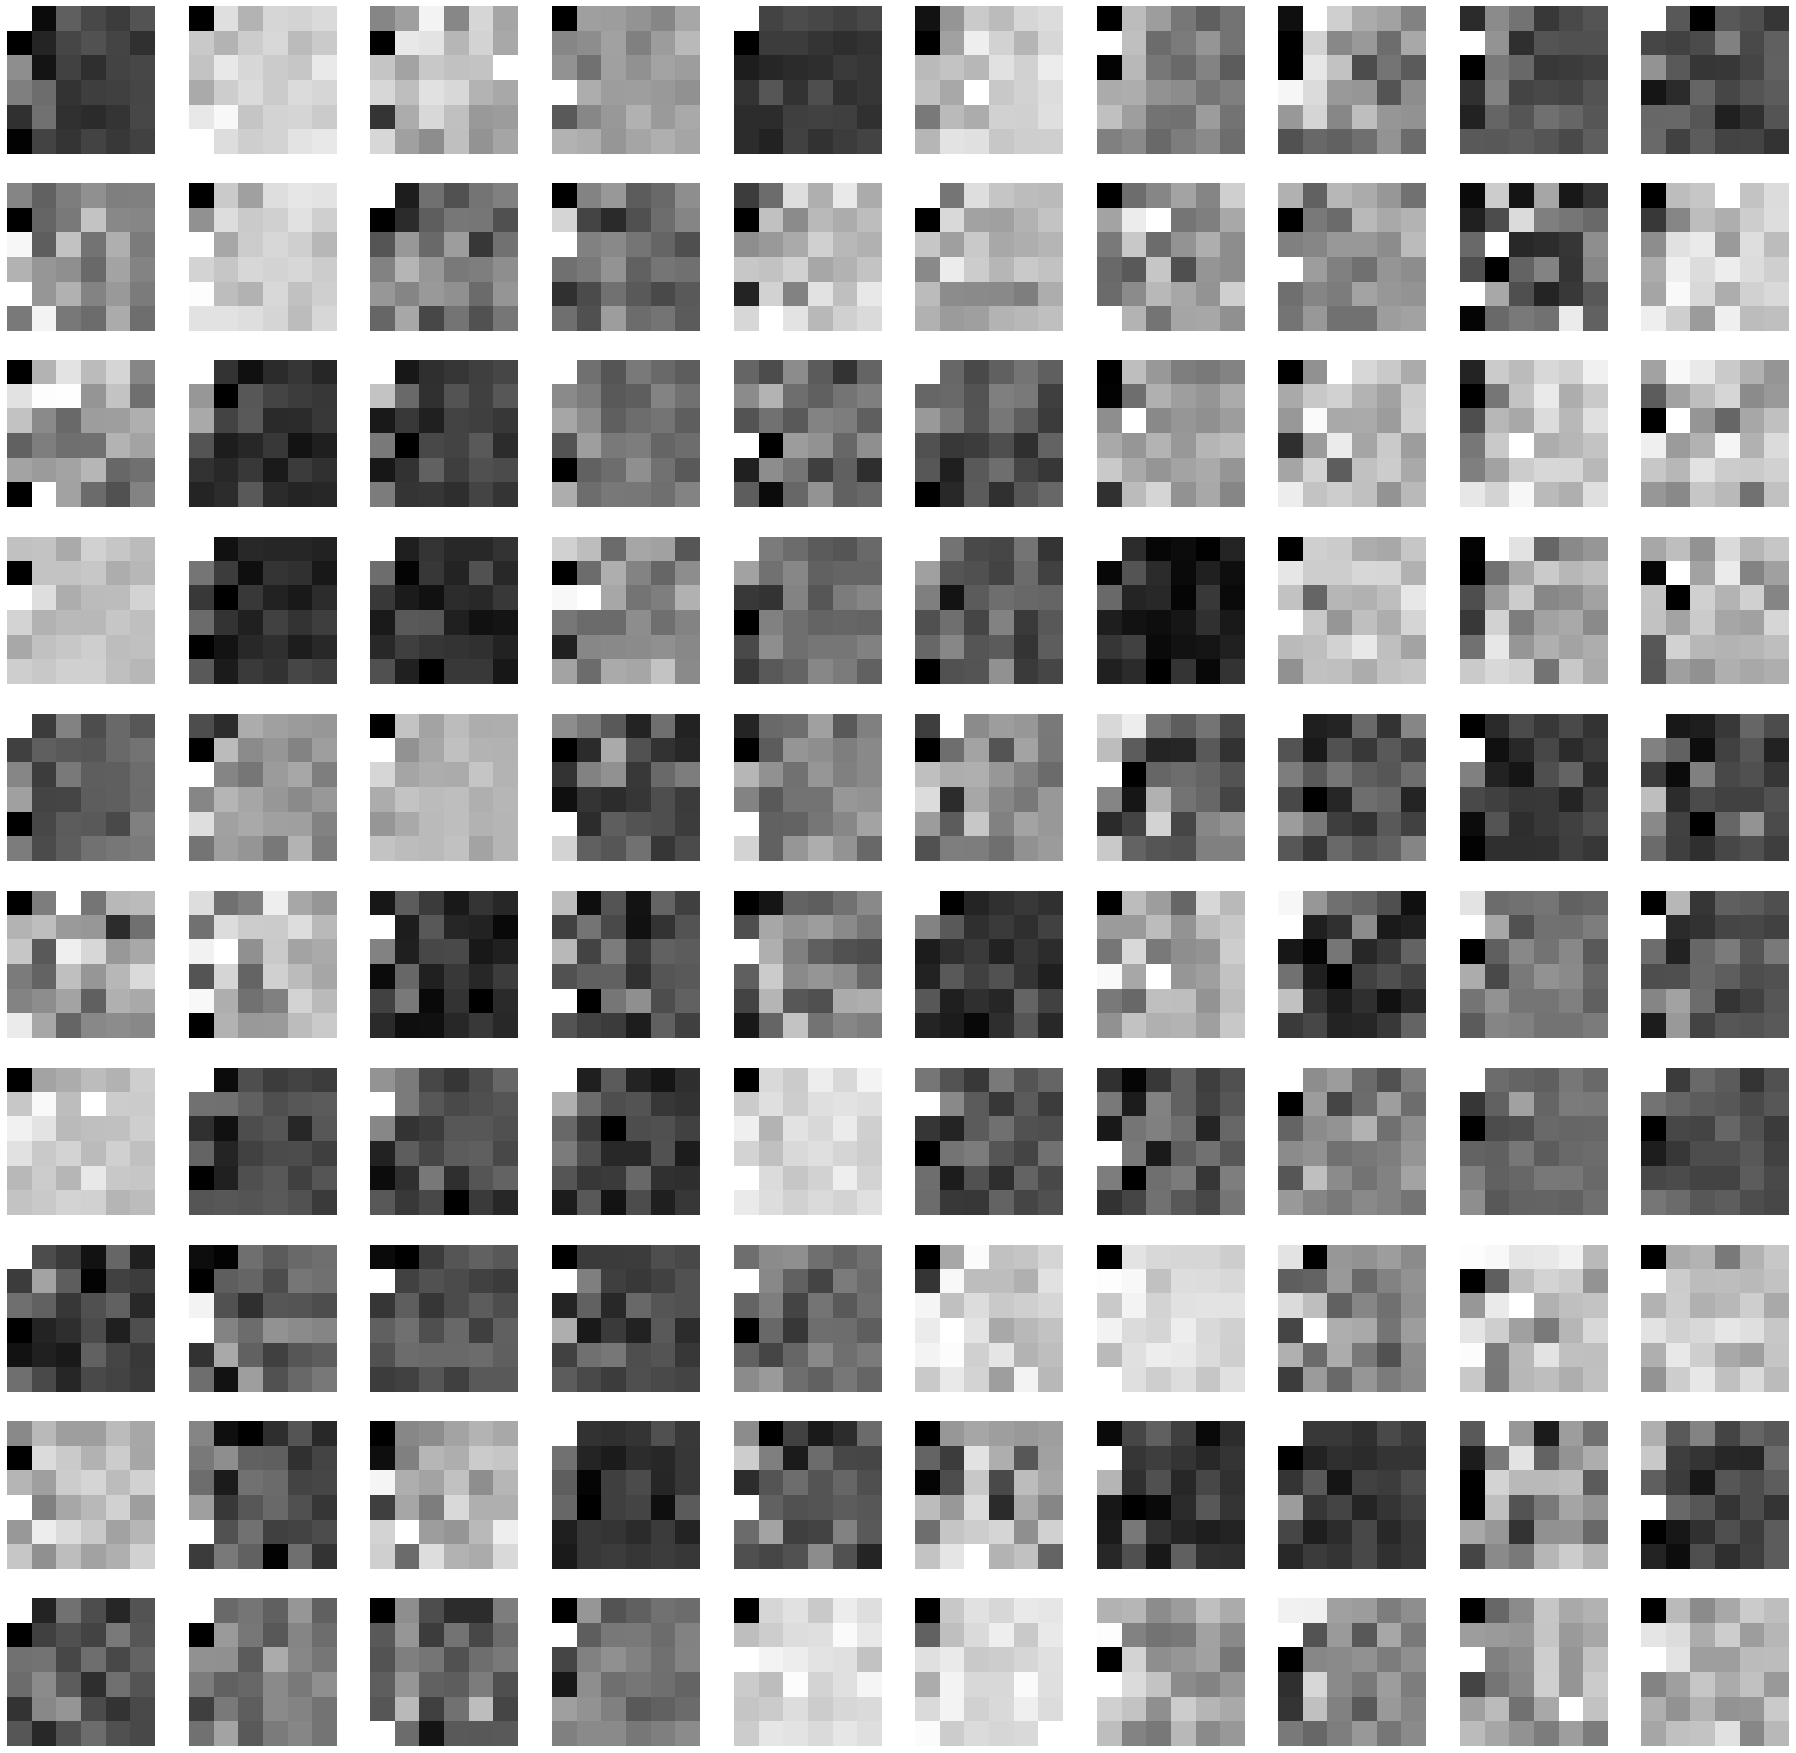

In [13]:
#12
Z_36 = project_data(X_norm, U, 36)
show_images(Z_36, 6)

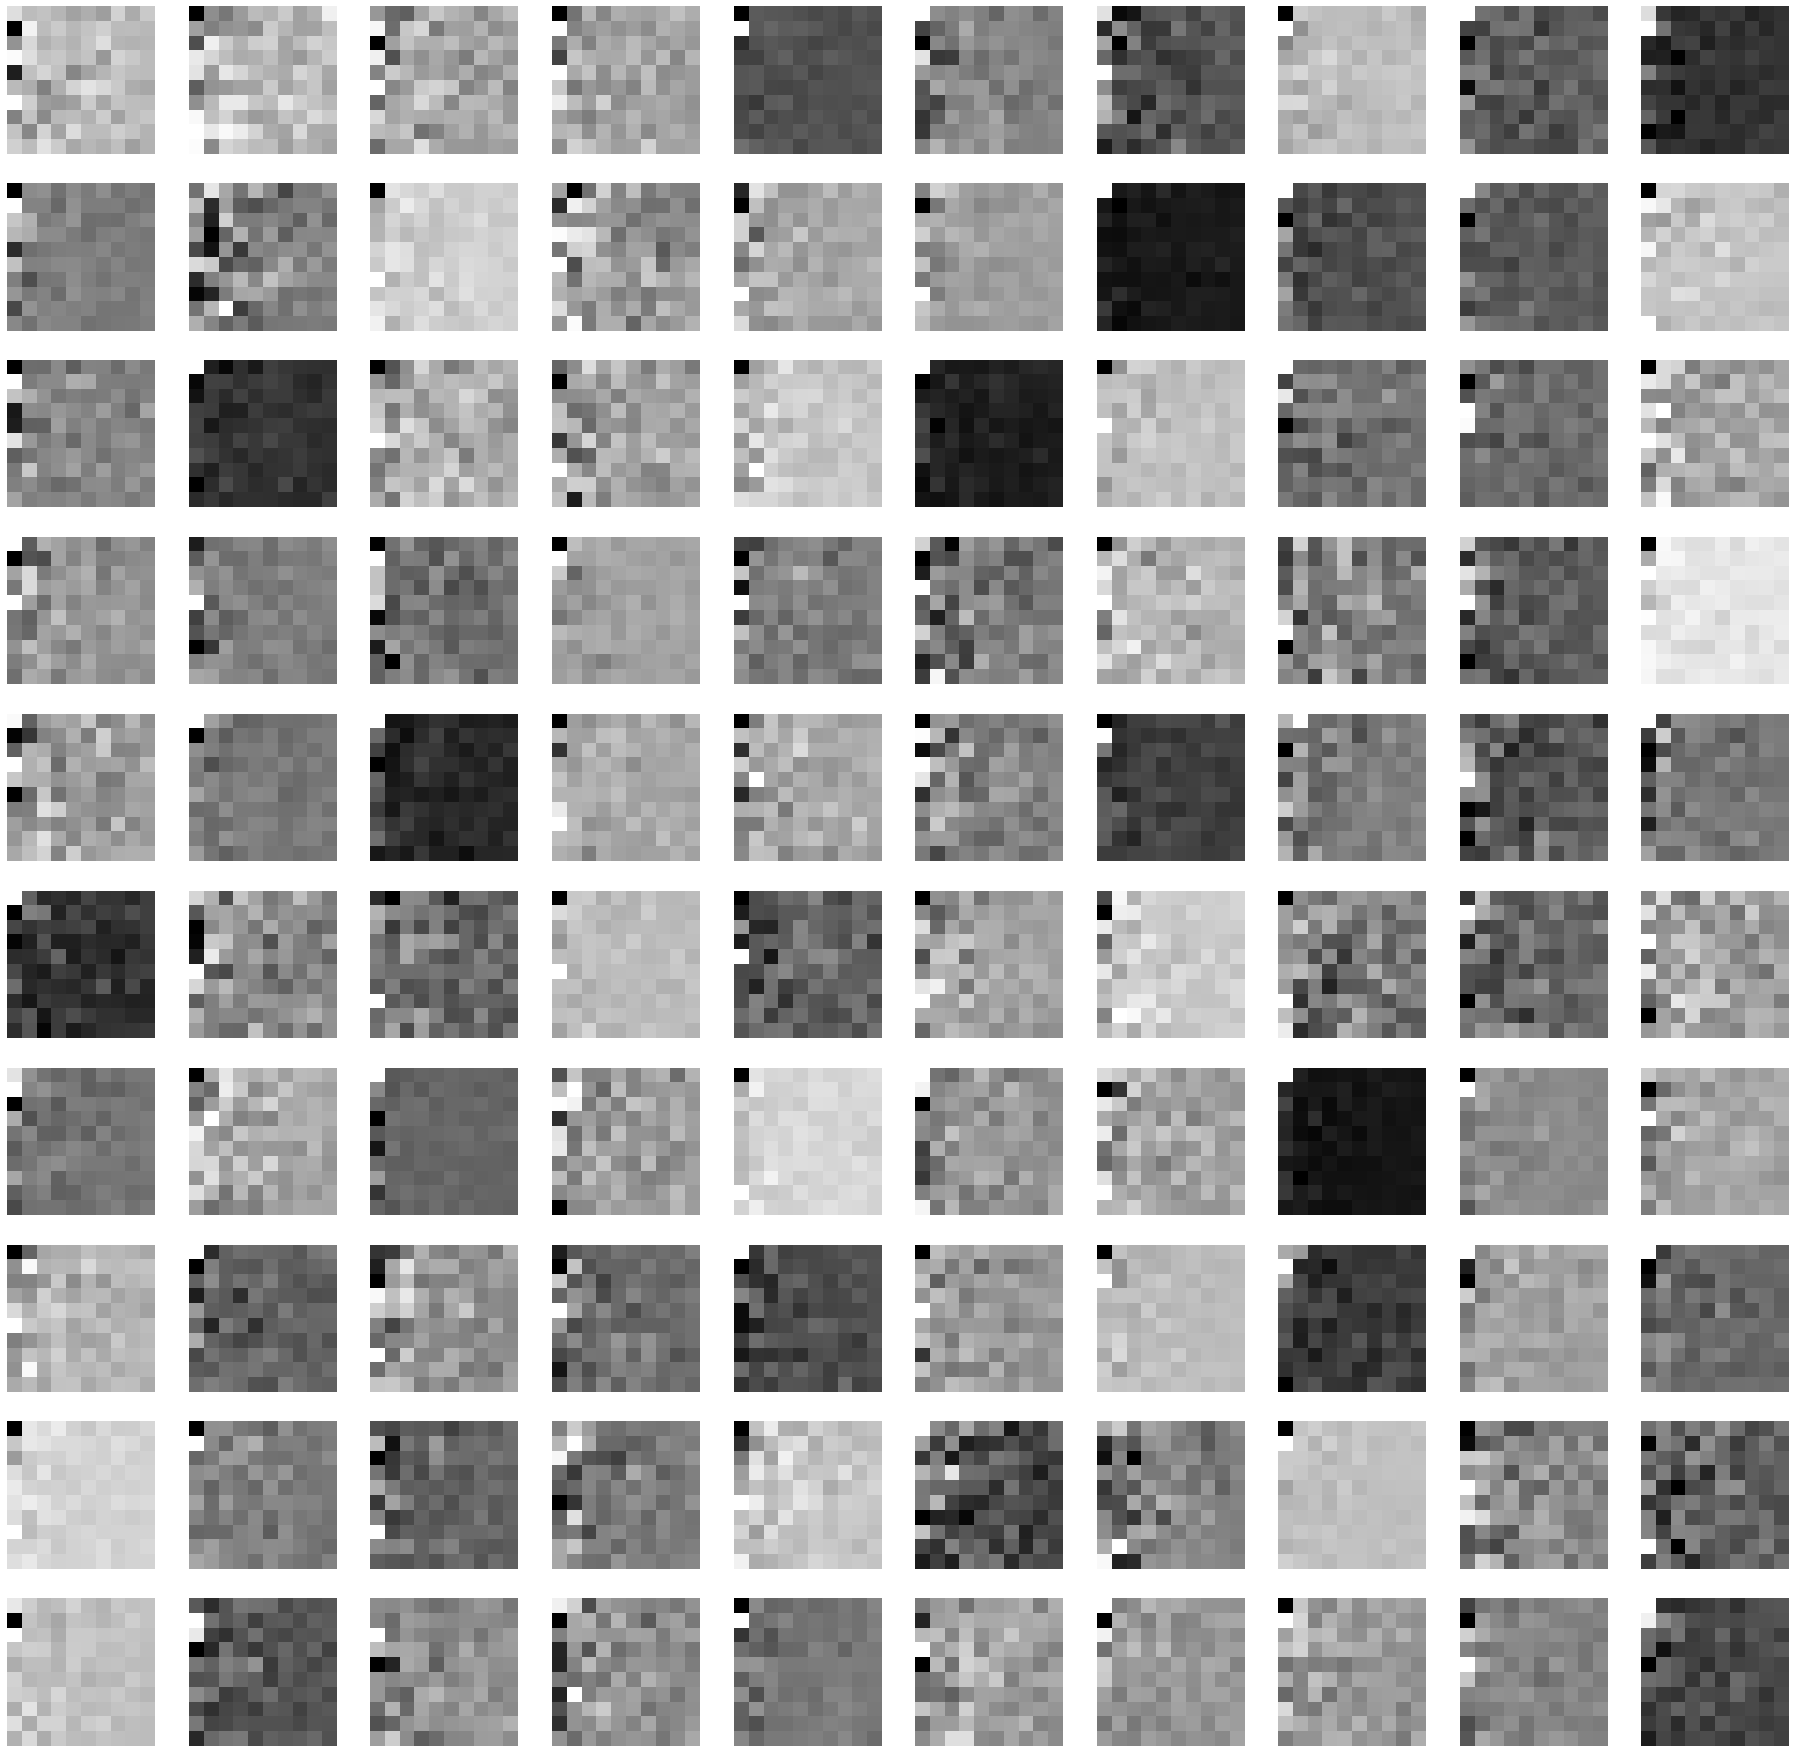

In [14]:
#14
Z_100 = project_data(X_norm, U, 100)
show_images(Z_100, 10)

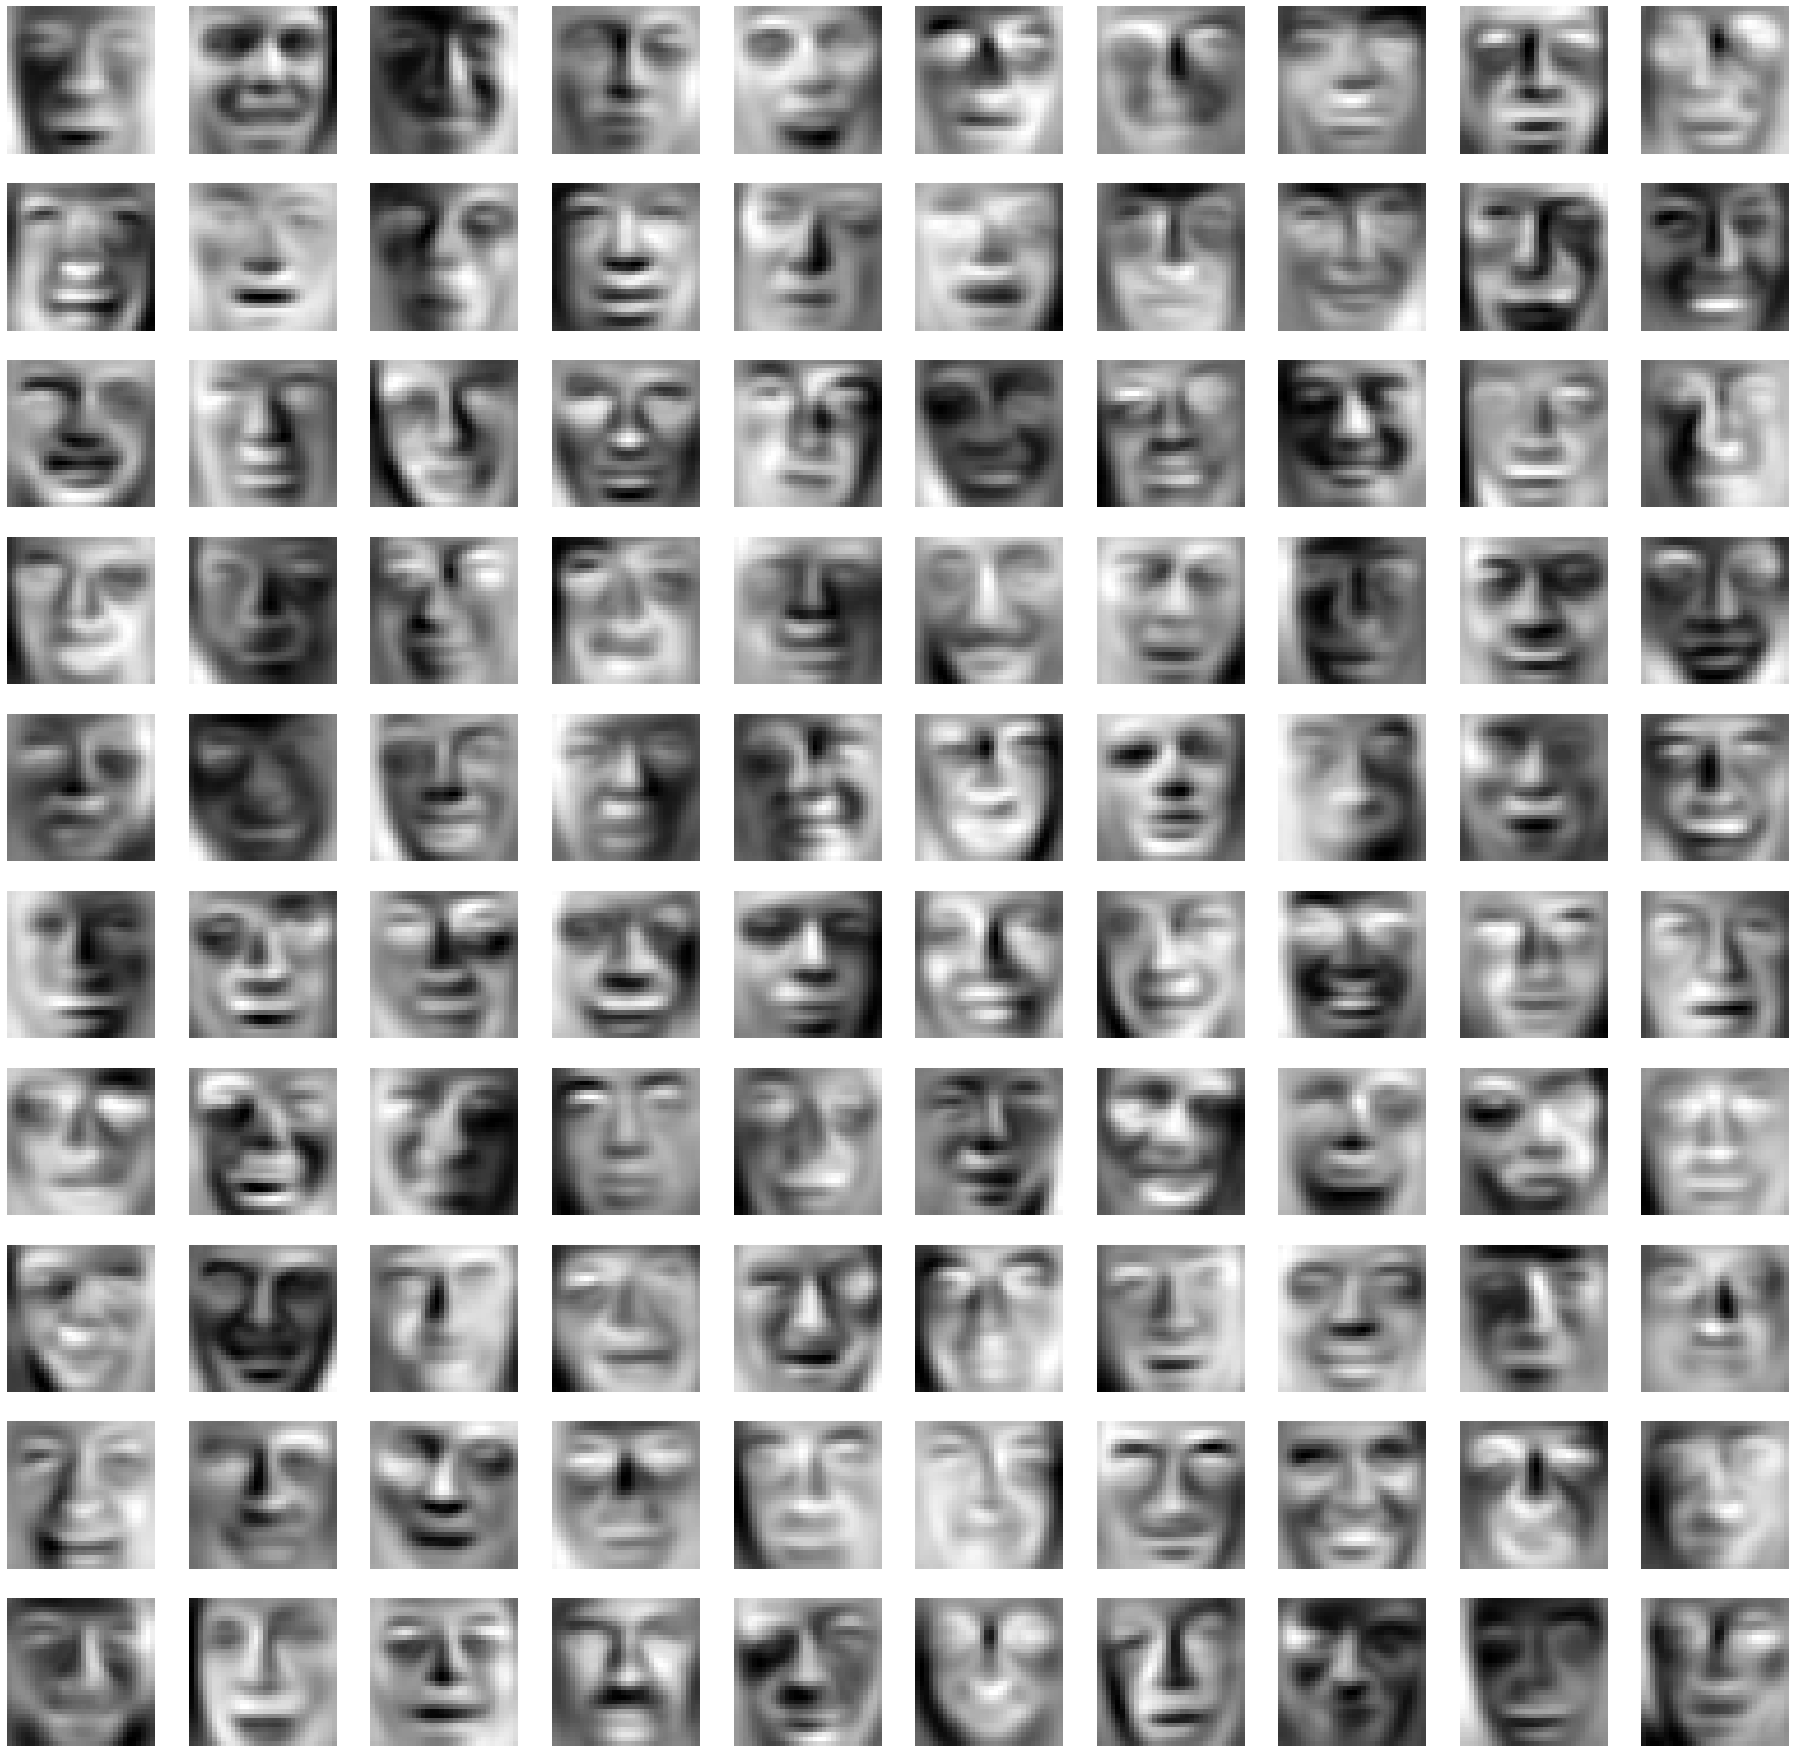

In [15]:
R_36 = recover_data(Z_36, U, 36)
show_images(R_36, 32)

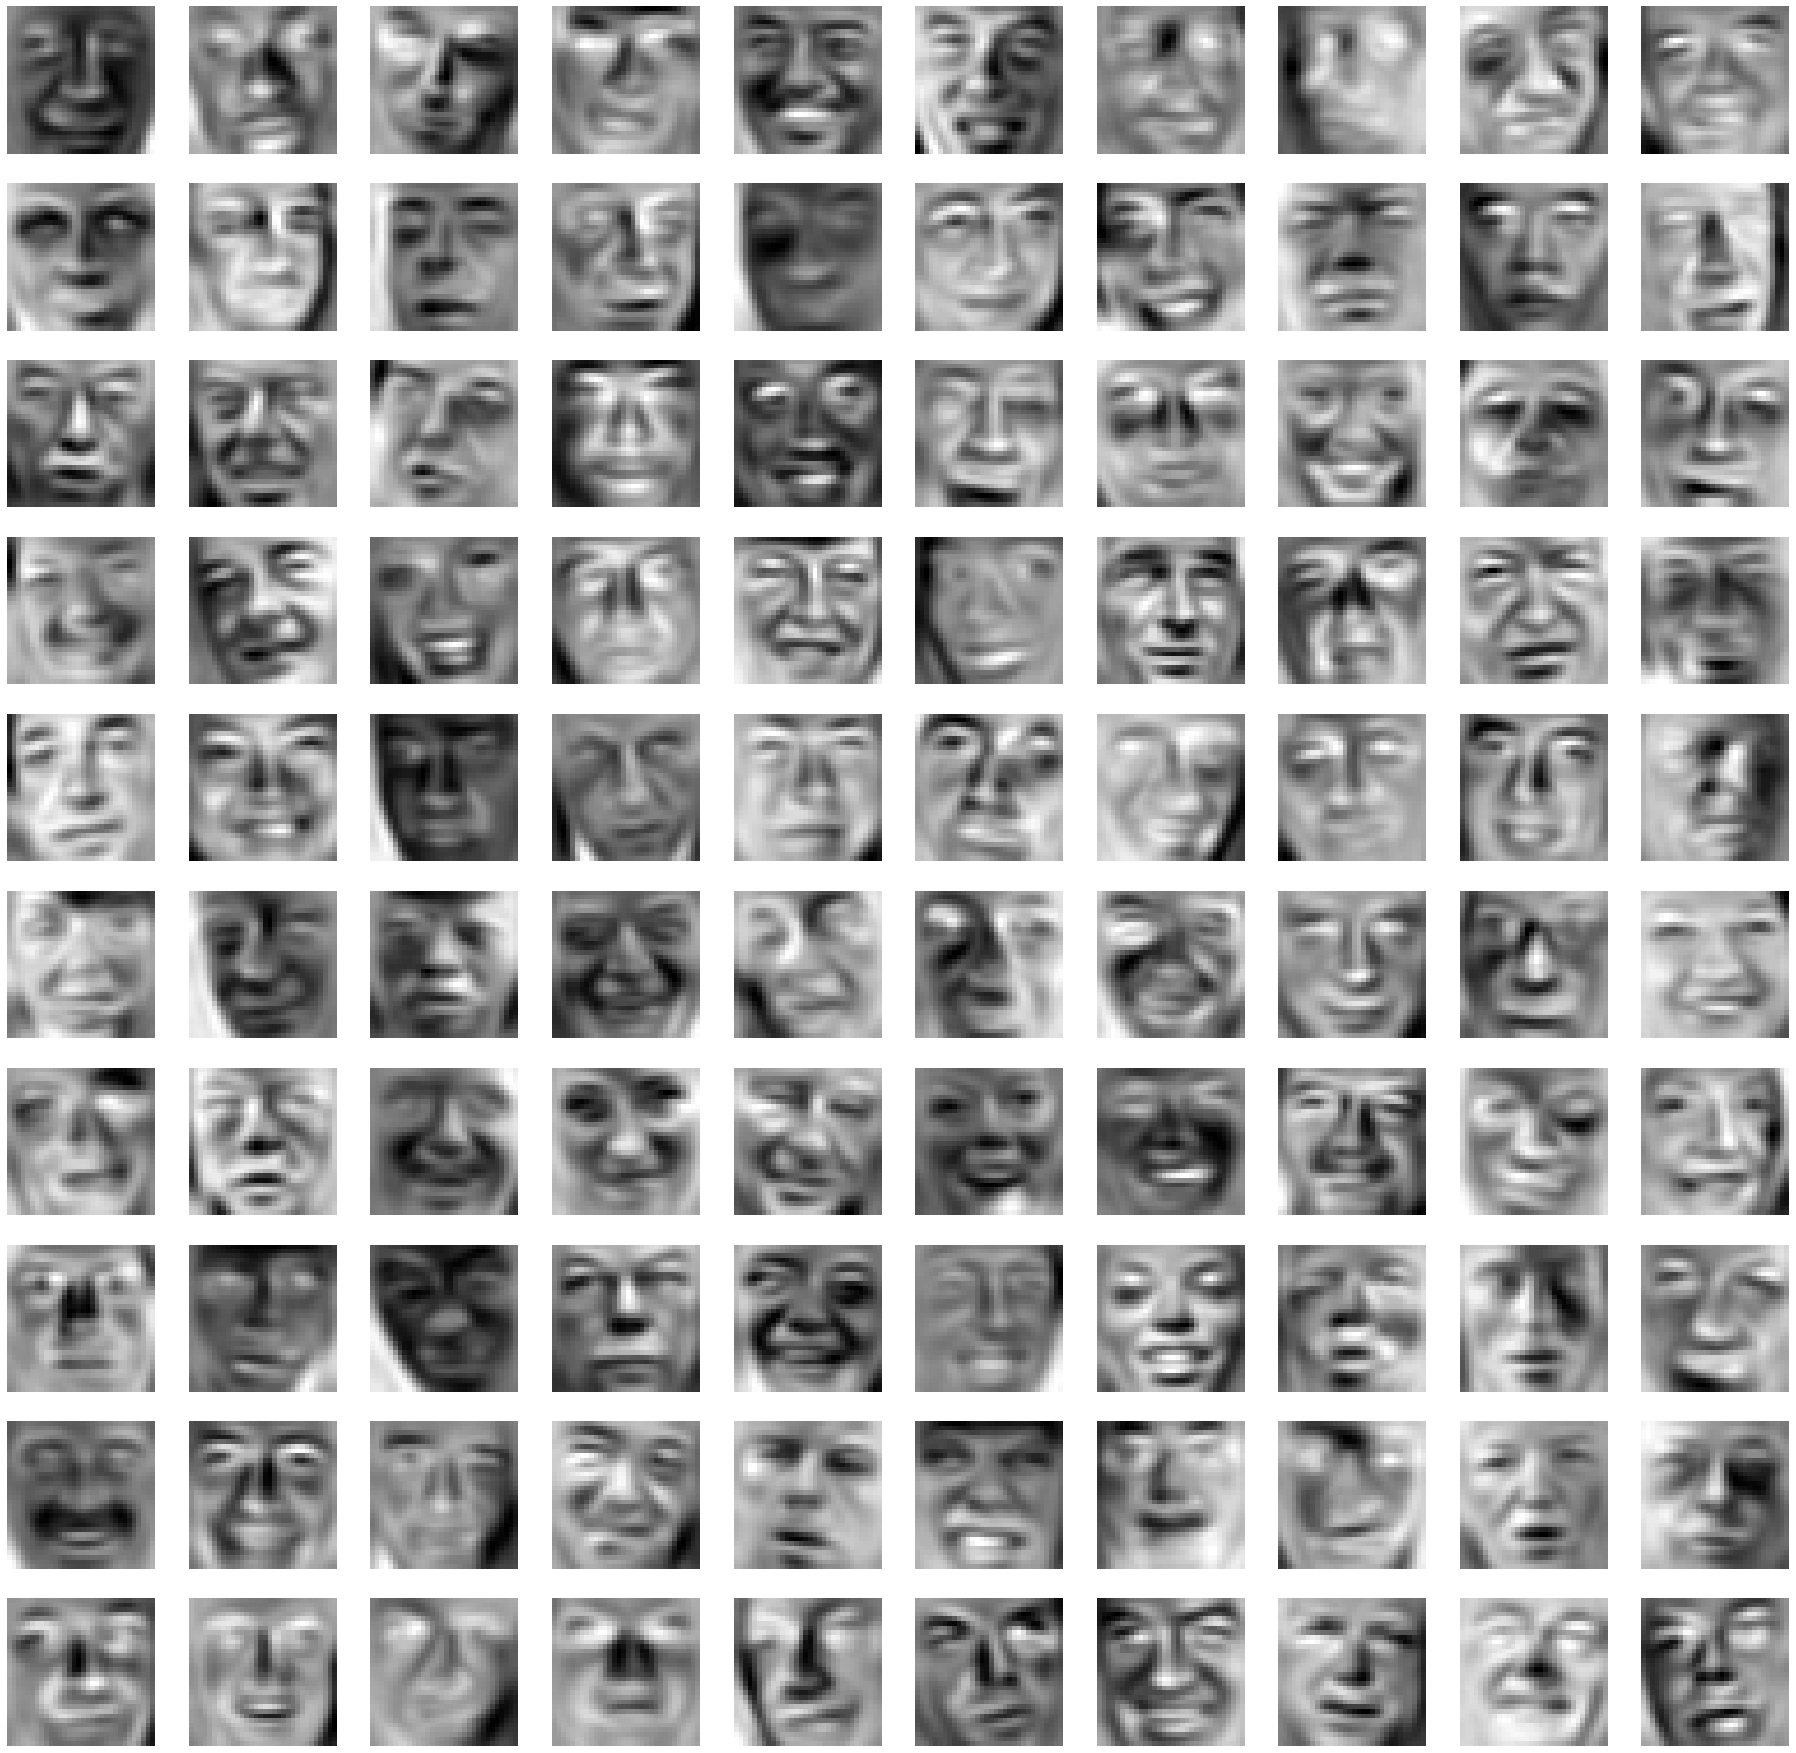

In [16]:
R_100 = recover_data(Z_100, U, 100)
show_images(R_100, 32)

In [17]:
import cv2

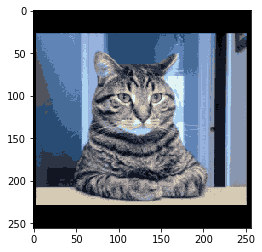

In [19]:
cat = cv2.imread('Data/Lab 6/cat_small_kmeans.png')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat)
plt.show()

In [21]:
pixels = np.unique(cat.reshape(-1, 3), axis=0)

In [22]:
from mpl_toolkits.mplot3d import Axes3D

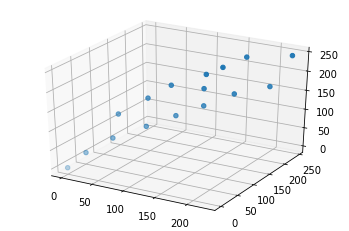

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2])
plt.show()

In [25]:
X_norm, mu, sigma = feature_normalize(pixels)
C = get_covariance_matrix(X_norm)
U, S, Vh = linalg.svd(C)

In [26]:
pixels2d = project_data(X_norm, U, 2)

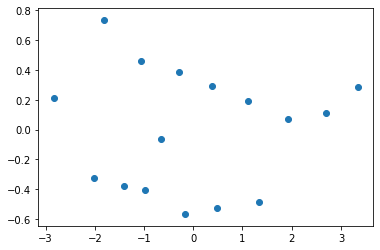

In [28]:
plt.scatter(pixels2d[:, 0], pixels2d[:, 1])
plt.show()